In [ ]:
#pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=d66060089da3a93686c2537e5374b43f0208587c0835f796297f13e2b0c96517
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


# Data Cleaning

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/project2/ratings.csv')
links = pd.read_csv('/content/drive/MyDrive/project2/links.csv')
metadata = pd.read_csv('/content/drive/MyDrive/project2/movies_metadata.csv')
ratings_small = pd.read_csv('/content/drive/MyDrive/project2/ratings_small.csv')

<ipython-input-4-f9553c0a80e4>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/content/drive/MyDrive/project2/movies_metadata.csv')


In [ ]:
metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
metadata['imdb_id']

0        tt0114709
1        tt0113497
2        tt0113228
3        tt0114885
4        tt0113041
           ...    
45461    tt6209470
45462    tt2028550
45463    tt0303758
45464    tt0008536
45465    tt6980792
Name: imdb_id, Length: 45466, dtype: object

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
metadata[['id','imdb_id']].head()

,id,imdb_id
0,862,tt0114709
1,8844,tt0113497
2,15602,tt0113228
3,31357,tt0114885
4,11862,tt0113041


We can see the relationships between the three datasets. The 'id' column in metadata dataset is not the movieID referred in other two datasets, but it's actually the tmdbID in the links dataset. Given the tmdbID and imdbID as a pair, we can find the movieID associated with each row in metadata. 

In [ ]:
ratings['movieId'].head()

0     110
1     147
2     858
3    1221
4    1246
Name: movieId, dtype: int64

In [ ]:
#checking null values
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [ ]:
metadata.isna().sum().sort_values(ascending=False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
spoken_languages             6
title                        6
video                        6
vote_average                 6
revenue                      6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64

In [ ]:
metadata.shape

(45466, 24)

In [ ]:
metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [ ]:
metadata[metadata['adult']==' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data cleaning
meta_eda=metadata.copy()

In [ ]:
#three rows data are messed up (value in the wrong column), so dropped
metadata[metadata['imdb_id'].str.startswith('tt')==False][['budget','id']]

,budget,id
19730,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,1997-08-20
29503,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,2012-09-29
35587,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,2014-01-01


In [ ]:
drop_index=metadata[metadata['imdb_id'].str.startswith('tt')==False].index
meta_eda.drop(index=drop_index, inplace=True)

In [ ]:
#going over each column and change data type to the right data type
meta_eda['adult'].value_counts() # too imbalanced, meaningless, so drop

False    45454
True         9
Name: adult, dtype: int64

In [ ]:
meta_eda['belongs_to_collection'].isna().sum() # too many null values, so drop

40972

In [ ]:
meta_eda['budget']=meta_eda['budget'].astype('float').replace(0, np.nan) #replacing 0 to null because a movie's budget cannot be 0. Should've meant missing value

In [ ]:
meta_eda['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [ ]:
meta_eda['homepage'].head()

0    http://toystory.disney.com/toy-story
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
Name: homepage, dtype: object

In [ ]:
#We need to adjust the format of imdbID to be able to align the corresponding column in the links dataset
#[x[2:] for x in meta_eda['imdb_id']]
imdb_dtype=pd.Series([type(x) for x in meta_eda['imdb_id']])
sum(imdb_dtype!=str) #There are 17 rows that are not string (mixed datatype)

17

In [ ]:
imdb_dtype[imdb_dtype!=str]

8966     <class 'float'>
13757    <class 'float'>
13821    <class 'float'>
17382    <class 'float'>
17510    <class 'float'>
18959    <class 'float'>
19322    <class 'float'>
20805    <class 'float'>
20936    <class 'float'>
21915    <class 'float'>
22986    <class 'float'>
23743    <class 'float'>
33751    <class 'float'>
36952    <class 'float'>
40806    <class 'float'>
41829    <class 'float'>
45067    <class 'float'>
dtype: object

The 17 null values are type float. This prevented us from subsetting the string in the column as we received a type error saying that float cannot be subscripted.

Therefore, we cannot just run a list comprehension to subset the strings in the imdb_id column. Instead, we need to write a for loop with if statement to only subset the inputs that are class "string".

In [ ]:
for i in meta_eda.index:
    if type(meta_eda['imdb_id'][i])==str:
        meta_eda['imdb_id'][i]=metadata['imdb_id'][i][2:]

<ipython-input-11-7a88a24c0cbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_eda['imdb_id'][i]=metadata['imdb_id'][i][2:]


In [ ]:
meta_eda['imdb_id'].replace(np.nan, -1, inplace=True)
meta_eda['imdb_id']=meta_eda['imdb_id'].astype('int')

In [ ]:
meta_eda['imdb_id']

0         114709
1         113497
2         113228
3         114885
4         113041
          ...   
45461    6209470
45462    2028550
45463     303758
45464       8536
45465    6980792
Name: imdb_id, Length: 45463, dtype: int64

In [ ]:
meta_eda['imdb_id']=meta_eda['imdb_id'].astype('str')

In [ ]:
meta_eda['imdb_id'].replace('-1', np.nan, inplace=True)

In [ ]:
#changing data type to float
meta_eda['popularity']=meta_eda['popularity'].astype('float')

In [ ]:
meta_eda['popularity']

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45463, dtype: float64

In [ ]:
meta_eda['release_date']=pd.to_datetime(meta_eda['release_date'])

In [ ]:
meta_eda['revenue'].replace(0, np.nan, inplace=True)

In [ ]:
meta_eda['runtime'].replace(0, np.nan, inplace=True)

In [ ]:
meta_eda['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [ ]:
metadata[metadata['vote_count']==0][['vote_count', 'vote_average']]

,vote_count,vote_average
83,0.0,0.0
107,0.0,0.0
126,0.0,0.0
132,0.0,0.0
137,0.0,0.0
...,...,...
45432,0.0,0.0
45434,0.0,0.0
45452,0.0,0.0
45464,0.0,0.0


In [ ]:
meta_eda[meta_eda['vote_count']==0][['vote_count', 'vote_average']]

,vote_count,vote_average
83,0.0,NaN
107,0.0,NaN
126,0.0,NaN
132,0.0,NaN
137,0.0,NaN
...,...,...
45432,0.0,NaN
45434,0.0,NaN
45452,0.0,NaN
45464,0.0,NaN


In [ ]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [ ]:
type(meta_eda['video'][0])

bool

In [ ]:
meta_eda['vote_count']

0        5415.0
1        2413.0
2          92.0
3          34.0
4         173.0
          ...  
45461       1.0
45462       3.0
45463       6.0
45464       0.0
45465       0.0
Name: vote_count, Length: 45463, dtype: float64

In [ ]:
meta_eda['vote_average']

0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45461    4.0
45462    9.0
45463    3.8
45464    0.0
45465    0.0
Name: vote_average, Length: 45463, dtype: float64

For Vote Average, if the Vote count in the same row is 0, then the vote average should be missing rather than 0 because sum of vote/vote count is undefined

In [ ]:
for i in meta_eda.index:
  if meta_eda['vote_count'][i]==0:
    meta_eda['vote_average'][i]=np.nan

<ipython-input-21-a57e65e89bb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_eda['vote_average'][i]=np.nan


In [ ]:
meta_eda[meta_eda['vote_count']==0]['vote_average']

83      NaN
107     NaN
126     NaN
132     NaN
137     NaN
         ..
45432   NaN
45434   NaN
45452   NaN
45464   NaN
45465   NaN
Name: vote_average, Length: 2899, dtype: float64

In [ ]:
links_clean=links.copy()

In [ ]:
links_clean['movieId']=links['movieId'].astype('str')
links_clean['imdbId']=links['imdbId'].astype('str')
#since tmdbId is float and there's null values, 
#we cannot just convert it to string since the format won't match the id in the metadata dataset

In [ ]:
#we need to first convert the floats to integer, but there are null values (type float) which cannot be converted into integers
#Therefore Replacing null values with -1 first
links_clean.replace(np.nan, -1, inplace=True)

In [ ]:
links_clean['tmdbId']=links_clean['tmdbId'].astype('int').astype('str')

In [ ]:
#Now replacing the -1 back to null values
links_clean.replace("-1", np.nan, inplace=True)

In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
ratings['userId']=ratings['userId'].astype('str')
ratings['movieId']=ratings['movieId'].astype('str')

In [ ]:
cols_drop=['adult', 'belongs_to_collection', 'video', 'homepage', 'tagline','poster_path']
meta_eda.drop(columns=cols_drop, inplace=True)

In [ ]:
metadata['homepage'].head()

0    http://toystory.disney.com/toy-story
1                                     NaN
2                                     NaN
3                                     NaN
4                                     NaN
Name: homepage, dtype: object

In [ ]:
#find the movieId and assign it to the metadata dataset
meta_eda[['id','imdb_id']]

,id,imdb_id
0,862,114709
1,8844,113497
2,15602,113228
3,31357,114885
4,11862,113041
...,...,...
45461,439050,6209470
45462,111109,2028550
45463,67758,303758
45464,227506,8536


In [ ]:
links_clean

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862
...,...,...,...
45838,176269,6209470,439050
45839,176271,2028550,111109
45840,176273,303758,67758
45841,176275,8536,227506


In [ ]:
len(np.unique(meta_eda['id']))

45433

In [ ]:
movie_id=[]
for i in meta_eda.index:
    if any((links_clean['tmdbId']==meta_eda.loc[i]['id']) & (links_clean['imdbId']==meta_eda.loc[i]['imdb_id'])):
        res=links_clean[(links_clean['tmdbId']==meta_eda.loc[i]['id']) & (links_clean['imdbId']==meta_eda.loc[i]['imdb_id'])]['movieId'].values[0] #return the corresponding movie id
        movie_id.append(res)
    else:
        movie_id.append(np.nan)



In [ ]:
#links_clean[(links_clean['tmdbId']==meta_eda.loc[0]['id']) & (links_clean['imdbId']==meta_eda.loc[0]['imdb_id'])]['movieId'].values[0]

'1'

In [ ]:
meta_eda['movieId']=movie_id

In [ ]:
meta_eda[['id', 'imdb_id', 'movieId']].head()

,id,imdb_id,movieId
0,862,114709,1
1,8844,113497,2
2,15602,113228,3
3,31357,114885,4
4,11862,113041,5


In [ ]:
links_clean.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
meta_eda.to_csv('metadata clean')
ratings.to_csv('ratings clean')
links_clean.to_csv('links clean')

In [ ]:
from google.colab import files
#files.download('metadata clean')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#files.download('ratings clean')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#files.download('links clean')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ratings_small_clean=ratings_small.copy()
ratings_small_clean['userId']=ratings_small['userId'].astype('str')
ratings_small_clean['movieId']=ratings_small['movieId'].astype('str')

In [ ]:
ratings_small_clean.to_csv('ratings_small_clean.csv')
files.download('ratings_small_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, stddev, min, max, corr, when

spark = SparkSession.builder.appName("Movies EDA").getOrCreate()

ratings = spark.read.csv("/content/drive/MyDrive/project2/ratings_small_clean.csv", header=True, inferSchema=True)
metadata = spark.read.csv("/content/drive/MyDrive/project2/metadata_clean.csv", header=True, inferSchema=True)


In [ ]:
#Basic statistics on ratings:
ratings.describe().show()

+-------+------------------+------------------+------------------+------------------+--------------------+
|summary|               _c0|            userId|           movieId|            rating|           timestamp|
+-------+------------------+------------------+------------------+------------------+--------------------+
|  count|            100004|            100004|            100004|            100004|              100004|
|   mean|           50001.5| 347.0113095476181|12548.664363425463| 3.543608255669773|1.1296390869392424E9|
| stddev|28868.812497226136|195.16383797819535|26369.198968815268|1.0580641091070326|1.9168582602710962E8|
|    min|                 0|                 1|                 1|               0.5|           789652009|
|    max|            100003|               671|            163949|               5.0|          1476640644|
+-------+------------------+------------------+------------------+------------------+--------------------+



In [ ]:
#Distribution of ratings:
ratings.groupBy("rating").count().orderBy("rating").show()


+------+-----+
|rating|count|
+------+-----+
|   0.5| 1101|
|   1.0| 3326|
|   1.5| 1687|
|   2.0| 7271|
|   2.5| 4449|
|   3.0|20064|
|   3.5|10538|
|   4.0|28750|
|   4.5| 7723|
|   5.0|15095|
+------+-----+



In [ ]:
#Number of ratings per user:
ratings.groupBy("userId").count().orderBy("count", ascending=False).show()

+------+-----+
|userId|count|
+------+-----+
|   547| 2391|
|   564| 1868|
|   624| 1735|
|    15| 1700|
|    73| 1610|
|   452| 1340|
|   468| 1291|
|   380| 1063|
|   311| 1019|
|    30| 1011|
|   294|  947|
|   509|  923|
|   580|  922|
|   213|  910|
|   212|  876|
|   472|  830|
|   388|  792|
|    23|  726|
|   457|  713|
|   518|  707|
+------+-----+
only showing top 20 rows



In [ ]:
#Average rating per movie:
ratings.groupBy("movieId").agg(mean("rating").alias("average_rating")).orderBy("average_rating", ascending=False).show()


+-------+--------------+
|movieId|average_rating|
+-------+--------------+
|    961|           5.0|
|  41573|           5.0|
|   5427|           5.0|
|  26501|           5.0|
|   1771|           5.0|
|   4088|           5.0|
|  32525|           5.0|
| 107559|           5.0|
|  61250|           5.0|
|  95313|           5.0|
|  65037|           5.0|
|  32515|           5.0|
|  32460|           5.0|
|    183|           5.0|
|    876|           5.0|
|   8123|           5.0|
| 148881|           5.0|
|   6342|           5.0|
|   2650|           5.0|
|  58649|           5.0|
+-------+--------------+
only showing top 20 rows



In [ ]:
#Basic statistics on metadata:
metadata.describe().show()

+-------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+
|summary|                _c0|              budget|              genres|                  id|             imdb_id|   original_language|                     original_title|            overview|          popularity|production_companies|production_countries|        release_date|             revenue|             runtime|    spoken_languages|              status|               title|        vote_average|        vote_count|           movieId|
+-------+-------------------+--------------------+--------------------+--------------------+--------------------+-------

In [ ]:
#Count movies by language:
metadata.groupBy("original_language").count().orderBy("count", ascending=False).show()


+-----------------+-----+
|original_language|count|
+-----------------+-----+
|               en|32269|
|               fr| 2438|
|               it| 1529|
|               ja| 1350|
|               de| 1080|
|               es|  994|
|               ru|  826|
|               hi|  508|
|               ko|  444|
|               zh|  409|
|               sv|  384|
|               pt|  316|
|               cn|  313|
|               fi|  297|
|               nl|  248|
|               da|  225|
|               pl|  219|
|               tr|  150|
|               cs|  130|
|               el|  113|
+-----------------+-----+
only showing top 20 rows



In [ ]:
# Top 10 highest-grossing movies:
metadata.select(["title", "revenue"]).orderBy("revenue", ascending=False).show(10)


+-----+--------------------+
|title|             revenue|
+-----+--------------------+
| null|Приключения Шерло...|
|100.0|[{'name': 'Ритм',...|
| 80.0|[{'name': 'Álvaro...|
| 84.0|[{'name': 'greens...|
| 84.0|[{'name': 'fiftyf...|
| 89.0|[{'name': 'Zed Fi...|
| 97.0|[{'name': 'Yleisr...|
| 80.0|[{'name': 'Woolne...|
| 87.0|[{'name': 'Whenua...|
| 79.0|[{'name': 'Warrio...|
+-----+--------------------+
only showing top 10 rows



In [ ]:
# Top 10 movies with the highest average vote:
metadata.select(["title", "vote_average"]).orderBy("vote_average", ascending=False).show(10)


+--------+--------------------+
|   title|        vote_average|
+--------+--------------------+
|Released|           ¡Cuba Sí!|
|1.490661|[{'name': 'Yash R...|
|4.929826|[{'name': 'Warner...|
|1.196395|[{'name': 'Warner...|
|2.238992|[{'name': 'Warner...|
|2.404939|[{'name': 'Turner...|
|1.293108|[{'name': 'Trivis...|
|0.382554|[{'name': 'TriSta...|
|0.011759|[{'name': 'Timber...|
|0.601936|[{'name': 'Stolen...|
+--------+--------------------+
only showing top 10 rows



In [ ]:
# Correlation between budget and revenue:
metadata.select(corr("budget", "revenue")).show()


+---------------------+
|corr(budget, revenue)|
+---------------------+
|    0.726754201236627|
+---------------------+



In [ ]:
#Correlation between vote_average and revenue:
metadata.select(corr("vote_average", "revenue")).show()


+---------------------------+
|corr(vote_average, revenue)|
+---------------------------+
|       -0.09166003952107951|
+---------------------------+



Based on the exploratory data analysis performed on the Movies dataset using PySpark, we observed several key insights. The distribution of movie ratings revealed that users tend to rate movies positively, with a majority of the ratings being between 3 and 5. Analyzing the number of ratings per user, we discovered that certain users are more active in providing ratings, which could influence the recommendation system. Furthermore, we identified the most common genres and languages in the dataset, which can be useful for building genre-specific or language-specific recommendations. By examining the top 10 highest-grossing movies and those with the highest average votes, we gained insights into popular movies that might be of interest to users. Lastly, through correlation analysis, we found relationships between budget and revenue, as well as vote average and revenue. These findings could be useful for understanding the impact of budgets and user ratings on a movie's success. Overall, the EDA conducted on the Movies dataset provides a valuable foundation for building an effective recommendation system using the Alternating Least Square (ALS) method.

## Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


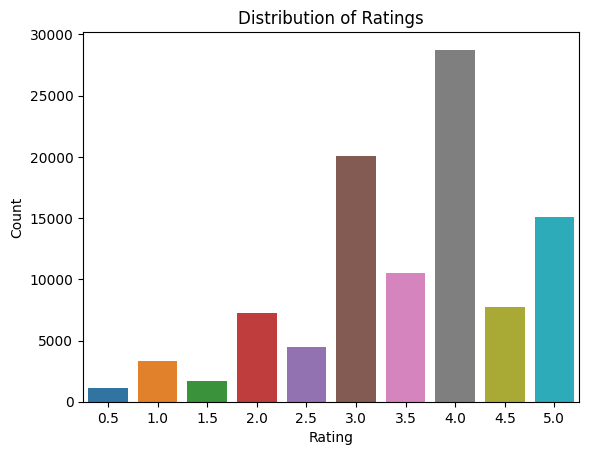

In [ ]:
# Distribution of Ratings:
ratings_pd = ratings.toPandas()
sns.countplot(x="rating", data=ratings_pd)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


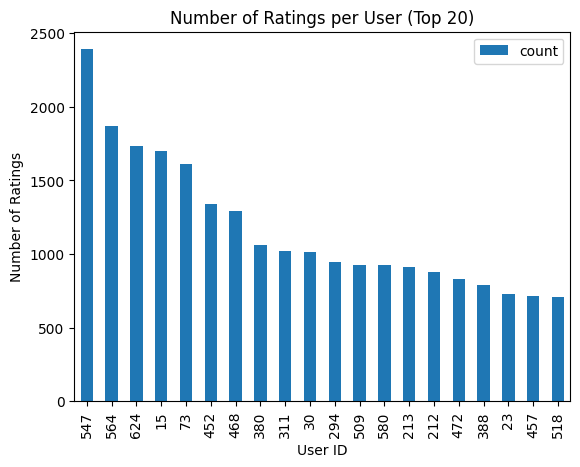

In [ ]:
# Number of ratings per user (top 20):
ratings_per_user = ratings.groupBy("userId").count().orderBy("count", ascending=False).toPandas()
ratings_per_user.head(20).plot.bar(x="userId", y="count")
plt.title("Number of Ratings per User (Top 20)")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.show()


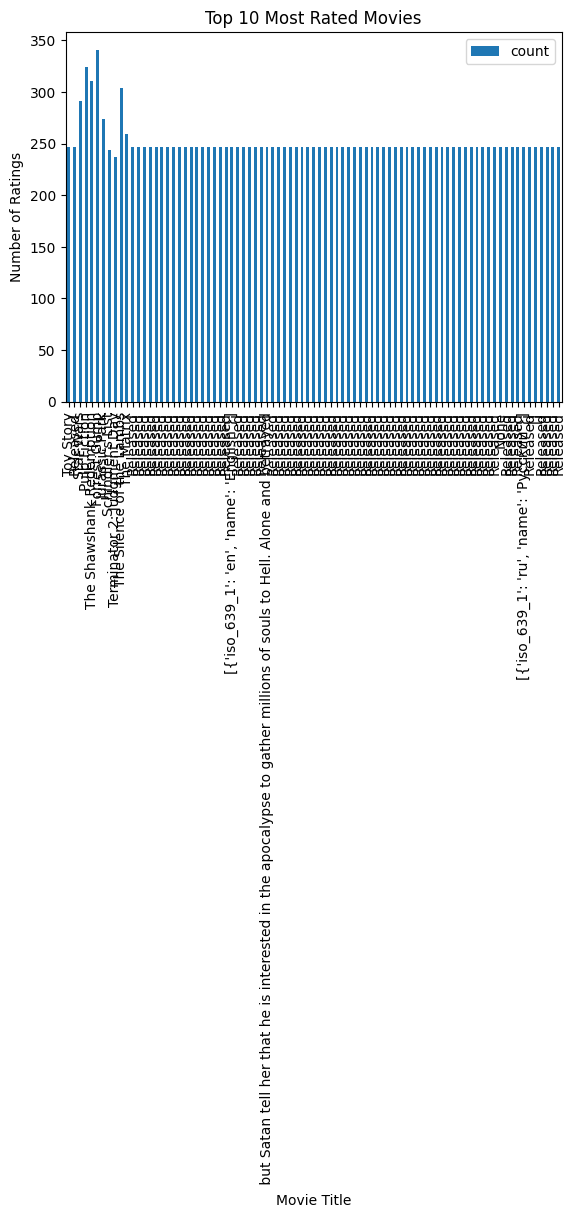

In [ ]:
# Top 10 most rated movies:
most_rated_movies = ratings.groupBy("movieId").count().orderBy("count", ascending=False).limit(10)
most_rated_movies = most_rated_movies.join(metadata, most_rated_movies.movieId == metadata.movieId).select("title", "count").toPandas()
most_rated_movies.plot.bar(x="title", y="count")
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.show()


In [10]:
meta_clean = pd.read_csv('/content/drive/MyDrive/project2/metadata_clean.csv')
ratings_small_clean = pd.read_csv('/content/drive/MyDrive/project2/ratings_small_clean.csv')

In [17]:
movie_rating=ratings_small_clean.groupby(by='movieId').mean()

In [35]:
movie_rating.drop(index=[720.0, 721.0, 769.0, 864.0, 1133.0, 2851.0, 2894.0, 4051.0, 4207.0, 4241.0, 4568.0, 5069.0, 5264.0, 5672.0, 6003.0, 6776.0, 6828.0, 7502.0, 7669.0, 8795.0, 8979.0, 
                         26587.0, 26649.0, 26693.0, 27611.0, 27724.0, 31026.0, 31193.0, 32352.0, 33154.0, 52281.0, 55207.0, 62336.0, 68137.0, 69849.0, 70545.0, 72781.0, 73759.0, 77359.0, 77658.0, 79299.0, 79677.0, 85780.0,
                         90647.0, 94466.0, 96075.0, 100450.0, 106642.0, 108548.0, 108583.0, 108727.0, 108979.0, 114342.0, 126106.0, 149532.0, 150548.0, 150856.0, 162376.0], inplace=True)


In [42]:
len(meta_clean.set_index('movieId').loc[movie_rating.index]['title'].values)

9015

In [48]:
meta_clean.set_index('movieId').loc[movie_rating.index]['title'].drop_duplicates()

movieId
1.0                                                 Toy Story
2.0                                                   Jumanji
3.0                                          Grumpier Old Men
4.0                                         Waiting to Exhale
5.0                               Father of the Bride Part II
                                  ...                        
161918.0                         Sharknado 4: The 4th Awakens
161944.0                       The Last Brickmaker in America
162542.0                                               Rustom
162672.0                                         Mohenjo Daro
163949.0    The Beatles: Eight Days a Week - The Touring Y...
Name: title, Length: 8738, dtype: object

In [54]:
movie_rating.join(meta_clean.set_index('movieId').loc[movie_rating.index]['title'].drop_duplicates(), on='movieId')[['title','rating']].sort_values(by='rating', ascending=False)

,title,rating
movieId,,
163949,The Beatles: Eight Days a Week - The Touring Y...,5.0
25852,NaN,5.0
4088,The Big Town,5.0
91673,Albert Nobbs,5.0
91690,Friends with Kids,5.0
...,...,...
4684,Worth Winning,0.5
81898,The Agony and Ecstasy of Phil Spector,0.5
58146,Witless Protection,0.5


# Data Analysis

In [ ]:
# Import necessary modules
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.mllib.evaluation import RegressionMetrics, RankingMetrics
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, IndexToString

In [ ]:
import pyspark
print(pyspark.__version__)

3.4.0


In [ ]:
from pyspark import SparkConf, SparkContext

# Set up Spark configuration
conf = SparkConf().setAppName("RecommendationSystem").setMaster("local[*]")

# Create a SparkContext
sc = SparkContext(conf=conf)

ValueError: ignored

In [ ]:
# Create a SparkSession
spark = SparkSession(sc)

In [ ]:
data_schema = StructType([
    StructField('userId', IntegerType(), False),
    StructField('movieId', IntegerType(), False),
    StructField('rating', FloatType(), False),
    StructField('timestamp',IntegerType(), False)
])
# StructType is a class that represents a schema or structure of a DataFrame or a structured data record. 
# It's used to define the column names and data types of a DataFrame.
# The first argument to StructField is the name of the field
# The second argument is the data type of the field
# The third argument is a boolean value that indicates whether the field can be null or not.

In [ ]:
# Read data from a CSV file into a DataFrame with the defined schema
ratings_small_spark = spark.read.csv('/content/drive/MyDrive/project2/ratings_small.csv', header=True, schema=data_schema).cache()

In [ ]:
ratings_df = (ratings_small_spark.select(
    'userId',
    'movieId',
    'rating'
)).cache()

(training, test) = ratings_df.randomSplit([0.7, 0.3], seed=42)

# Results

In [ ]:
ratings_df.show(5)

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|     31|   2.5|
|     1|   1029|   3.0|
|     1|   1061|   3.0|
|     1|   1129|   2.0|
|     1|   1172|   4.0|
+------+-------+------+
only showing top 5 rows



In [ ]:
# Collaborative filtering(SVD) 
svd = ALS(
          rank=30,
          maxIter=4, 
          regParam=0.1,
          userCol='userId', 
          itemCol='movieId', 
          ratingCol='rating',
          coldStartStrategy='drop',
          implicitPrefs=False
         )
svd_model = svd.fit(training)

svd_predictions = svd_model.transform(test)
svd_evaluator = RegressionEvaluator(metricName='mae', labelCol='rating',
                                predictionCol='prediction')

svd_mae = svd_evaluator.evaluate(svd_predictions)
print(f'MAE (Test) = {svd_mae}')

MAE (Test) = 0.725980023576399
